# Deep Learning Project
## Lending Club Loan Data Analysis
#### Sonal Gor
#### April 2024

#### Import Required Libraries

In [369]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Flatten, Dense 

#### 3 Files were provided. Will look at all three briefly to determine next steps in EDA

In [370]:
file_path_input = r"C:\Users\Sonal\Downloads\Lending_Club Loan Deep Learning Project\input.csv"
file_path_loan_data = r"C:\Users\Sonal\Downloads\Lending_Club Loan Deep Learning Project\loan_data.csv"
file_path_output = r"C:\Users\Sonal\Downloads\Lending_Club Loan Deep Learning Project\output.csv"

In [371]:
df_input = pd.read_csv(file_path_input)
df_loan_data = pd.read_csv(file_path_loan_data)
df_output = pd.read_csv(file_path_output)

In [372]:
df_input.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9577 entries, 0 to 9576
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   1            9577 non-null   int64  
 1   0.1189       9577 non-null   float64
 2   829.1        9577 non-null   float64
 3   11.35040654  9577 non-null   float64
 4   19.48        9577 non-null   float64
 5   737          9577 non-null   int64  
 6   5639.958333  9577 non-null   float64
 7   28854        9577 non-null   int64  
 8   52.1         9577 non-null   float64
 9   0            9577 non-null   int64  
 10  0.1          9577 non-null   int64  
 11  0.2          9577 non-null   int64  
 12  0.3          9577 non-null   int64  
 13  0.4          9577 non-null   int64  
 14  1.1          9577 non-null   int64  
 15  0.5          9577 non-null   int64  
 16  0.6          9577 non-null   int64  
 17  0.7          9577 non-null   int64  
dtypes: float64(6), int64(12)
memory usage: 1.3 MB


In [373]:
df_loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [374]:
df_output.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9577 entries, 0 to 9576
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       9577 non-null   int64
 1   1       9577 non-null   int64
dtypes: int64(2)
memory usage: 149.8 KB


#### The data to be analyzed is in the file named Loan_Data

In [375]:
#Examine first 5 lines of data
df_loan_data.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [376]:
#Convert categorical columns into numerical data

df_loan_data_numerical = pd.get_dummies(df_loan_data, columns= ['purpose'], dtype=int)

In [377]:
df_loan_data_numerical.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_all_other,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,0,1,0,0,0,0,0


In [378]:
#Get descriptive stats

df_loan_data_numerical.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_all_other,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054,0.243370,0.131760,0.413134,0.035811,0.065671,0.045625,0.064627
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676,0.429139,0.338248,0.492422,0.185829,0.247720,0.208682,0.245880
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [379]:
#Check for missing values
df_loan_data_numerical.isna().sum()

credit.policy                 0
int.rate                      0
installment                   0
log.annual.inc                0
dti                           0
fico                          0
days.with.cr.line             0
revol.bal                     0
revol.util                    0
inq.last.6mths                0
delinq.2yrs                   0
pub.rec                       0
not.fully.paid                0
purpose_all_other             0
purpose_credit_card           0
purpose_debt_consolidation    0
purpose_educational           0
purpose_home_improvement      0
purpose_major_purchase        0
purpose_small_business        0
dtype: int64

In [380]:
#Check for duplicates

df_loan_data_numerical.duplicated().sum()

0

#### No missing values or duplicates found

### Examine features and how they relate to the not fully paid feature (y)

array([[<Axes: title={'center': 'credit.policy'}>,
        <Axes: title={'center': 'int.rate'}>,
        <Axes: title={'center': 'installment'}>,
        <Axes: title={'center': 'log.annual.inc'}>],
       [<Axes: title={'center': 'dti'}>,
        <Axes: title={'center': 'fico'}>,
        <Axes: title={'center': 'days.with.cr.line'}>,
        <Axes: title={'center': 'revol.bal'}>],
       [<Axes: title={'center': 'revol.util'}>,
        <Axes: title={'center': 'inq.last.6mths'}>,
        <Axes: title={'center': 'delinq.2yrs'}>,
        <Axes: title={'center': 'pub.rec'}>],
       [<Axes: title={'center': 'not.fully.paid'}>,
        <Axes: title={'center': 'purpose_all_other'}>,
        <Axes: title={'center': 'purpose_credit_card'}>,
        <Axes: title={'center': 'purpose_debt_consolidation'}>],
       [<Axes: title={'center': 'purpose_educational'}>,
        <Axes: title={'center': 'purpose_home_improvement'}>,
        <Axes: title={'center': 'purpose_major_purchase'}>,
        <Axe

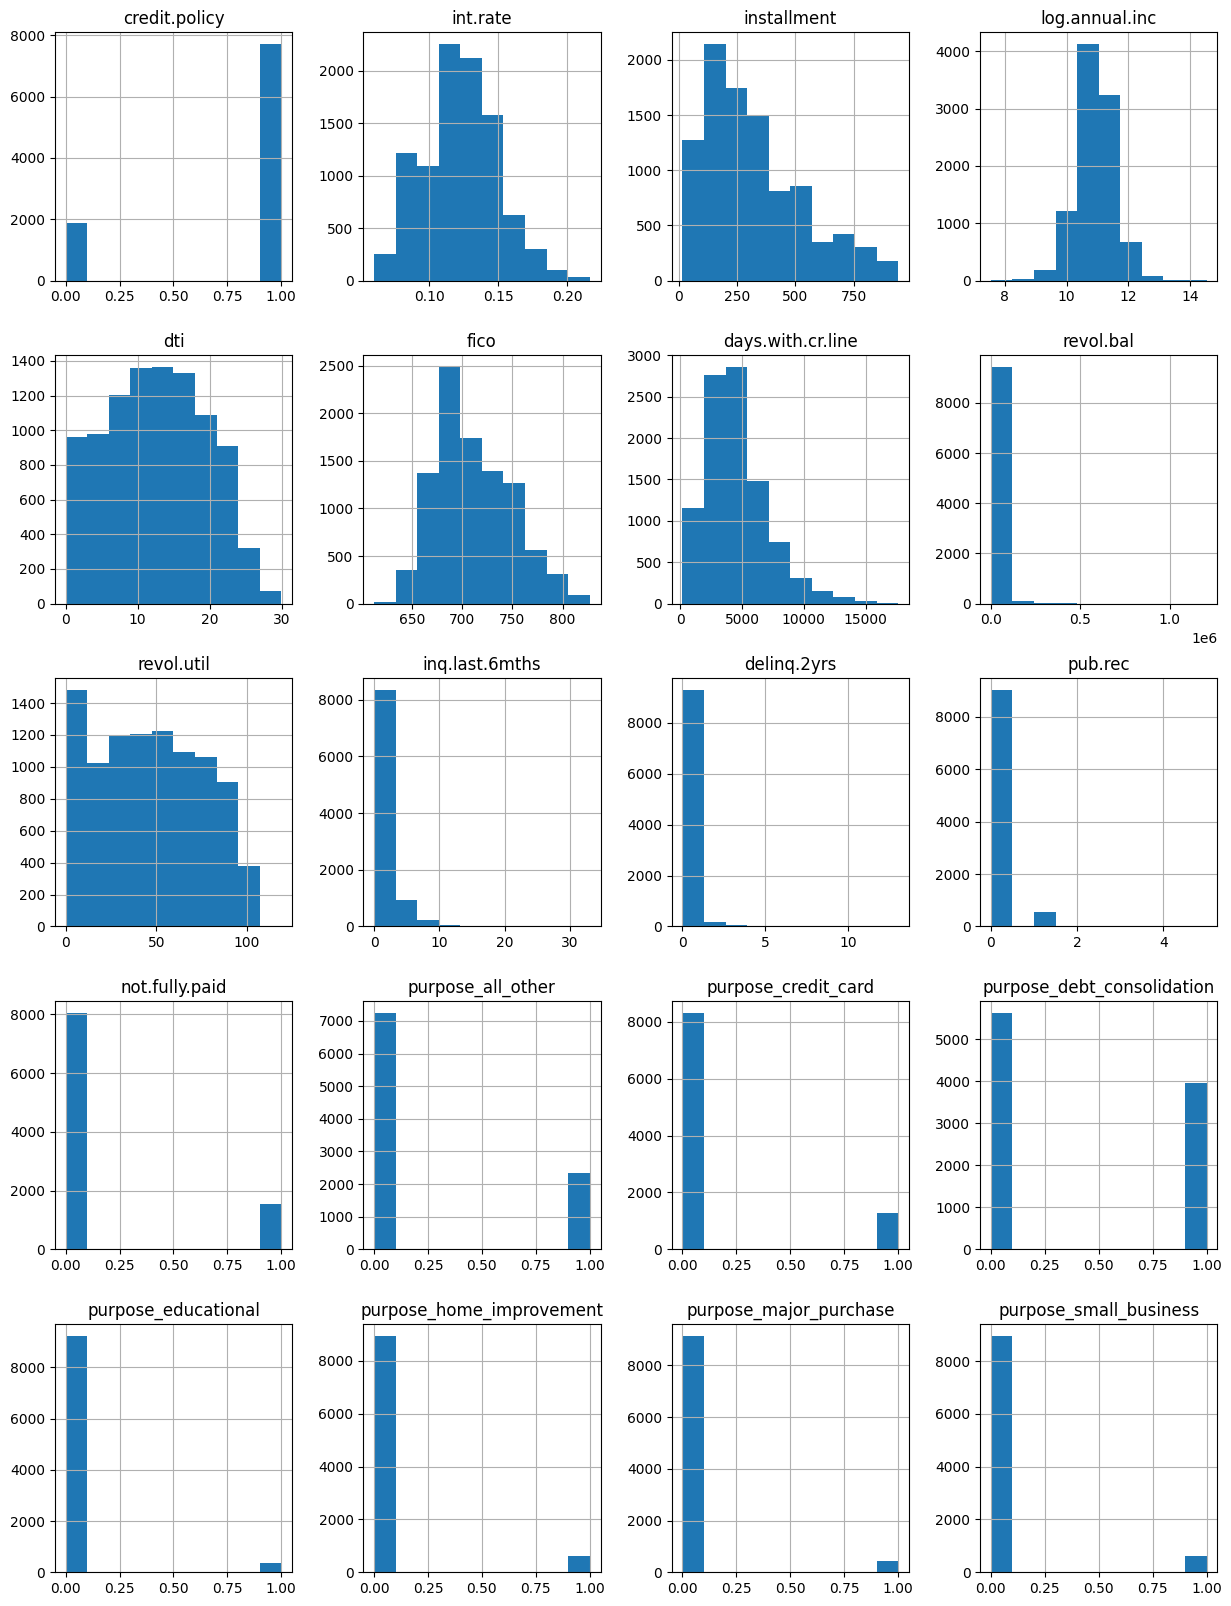

In [381]:
df_loan_data_numerical.hist(figsize=(15,20))

#### Most people are consolidating their debt or "some other" purpose

##### Examine the clients who have defaulted (not fully paid =1)

In [382]:
#Filter for clients who have defaulted (not.fully.paid is 1)

df_of_defaulted_clients = df_loan_data_numerical[df_loan_data_numerical['not.fully.paid'] == 1]

array([[<Axes: title={'center': 'credit.policy'}>,
        <Axes: title={'center': 'int.rate'}>,
        <Axes: title={'center': 'installment'}>,
        <Axes: title={'center': 'log.annual.inc'}>],
       [<Axes: title={'center': 'dti'}>,
        <Axes: title={'center': 'fico'}>,
        <Axes: title={'center': 'days.with.cr.line'}>,
        <Axes: title={'center': 'revol.bal'}>],
       [<Axes: title={'center': 'revol.util'}>,
        <Axes: title={'center': 'inq.last.6mths'}>,
        <Axes: title={'center': 'delinq.2yrs'}>,
        <Axes: title={'center': 'pub.rec'}>],
       [<Axes: title={'center': 'not.fully.paid'}>,
        <Axes: title={'center': 'purpose_all_other'}>,
        <Axes: title={'center': 'purpose_credit_card'}>,
        <Axes: title={'center': 'purpose_debt_consolidation'}>],
       [<Axes: title={'center': 'purpose_educational'}>,
        <Axes: title={'center': 'purpose_home_improvement'}>,
        <Axes: title={'center': 'purpose_major_purchase'}>,
        <Axe

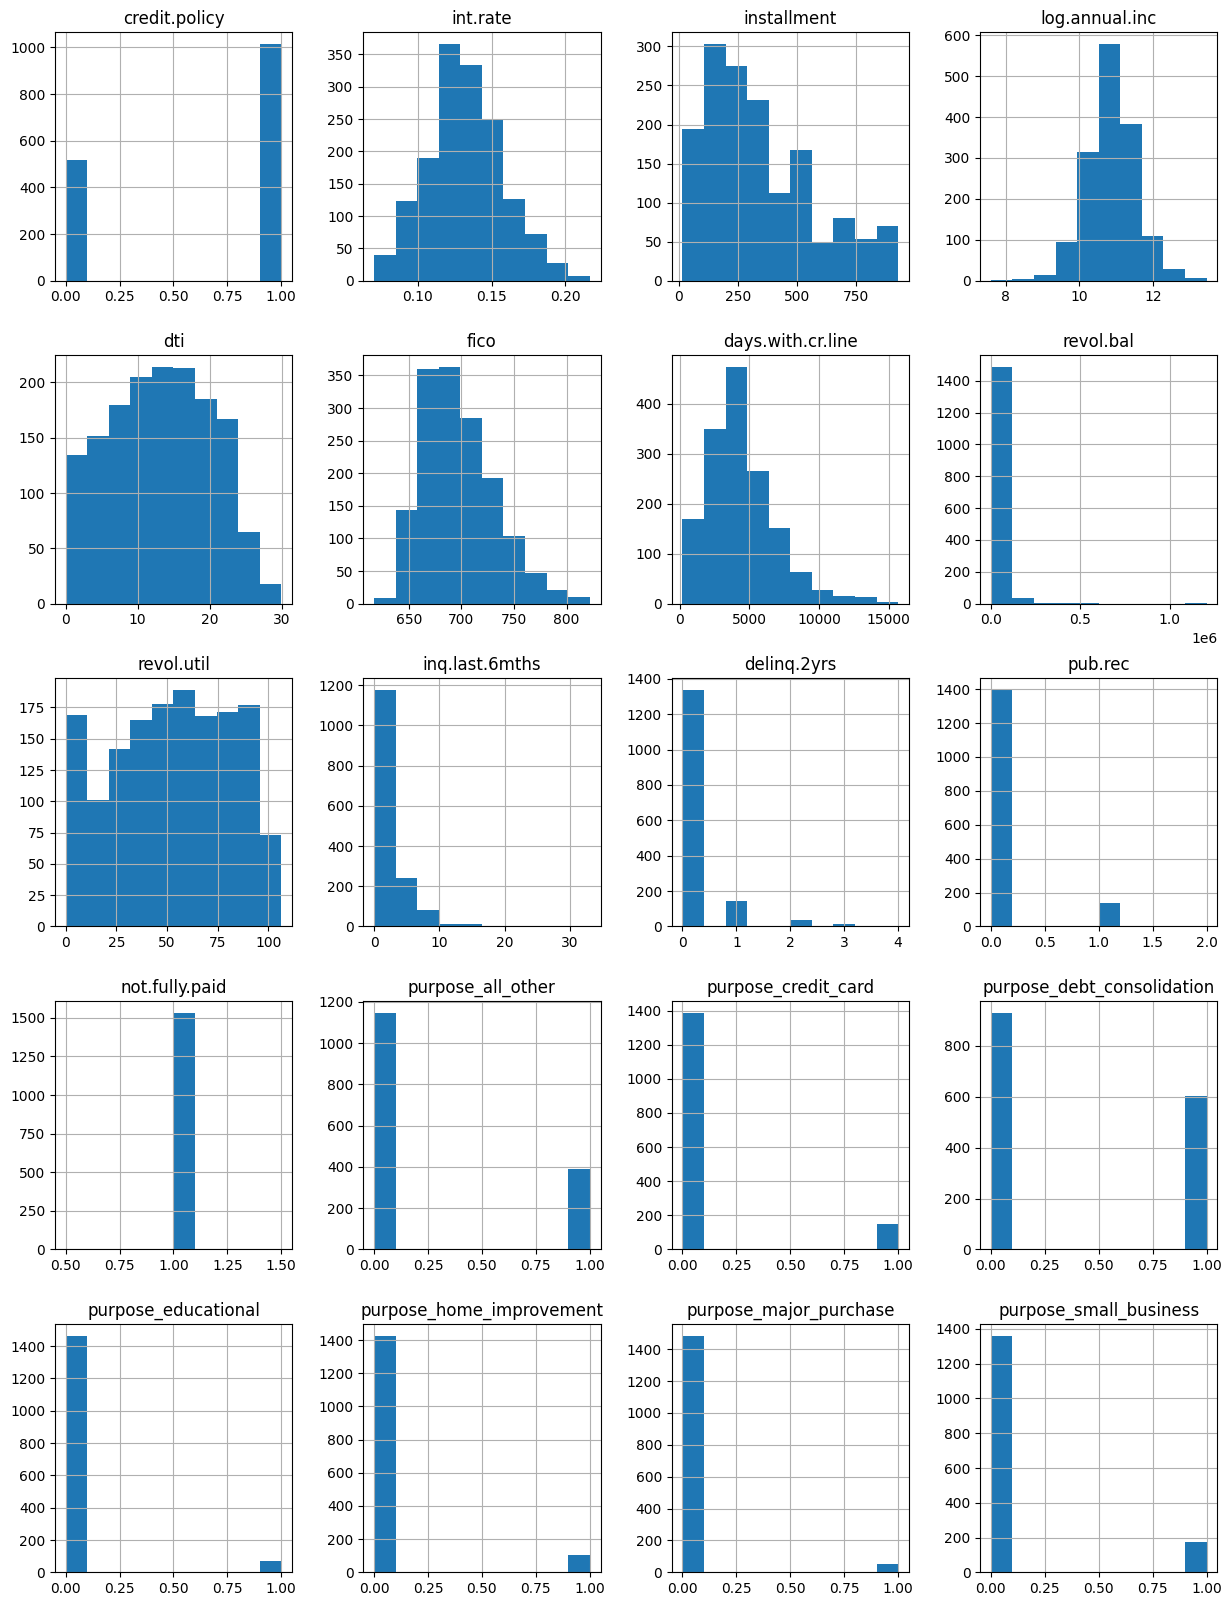

In [383]:
df_of_defaulted_clients.hist(figsize=(15,20))

#### Insights from the data

##### Around 2/3 of those who defaulted met the lending club's criteria. The Lending club should change its credit underwriting criteria

##### Only roughly 25% of those who didn't meet the lending club's criteria defaulted

##### The distribution of interest rates among those who defaulted is similar to the distribution of interest rates among the entire dataset. A good assessment would have resulted in those who defaulted having higher interest rates than those who didn't. 

##### Credit scores are similarly distributed among those who defaulted and those who didn't.





#### Check correlation between features

In [384]:
corr_matrix = df_loan_data_numerical.corr()
print(corr_matrix)

                            credit.policy  int.rate  installment  \
credit.policy                    1.000000 -0.294089     0.058770   
int.rate                        -0.294089  1.000000     0.276140   
installment                      0.058770  0.276140     1.000000   
log.annual.inc                   0.034906  0.056383     0.448102   
dti                             -0.090901  0.220006     0.050202   
fico                             0.348319 -0.714821     0.086039   
days.with.cr.line                0.099026 -0.124022     0.183297   
revol.bal                       -0.187518  0.092527     0.233625   
revol.util                      -0.104095  0.464837     0.081356   
inq.last.6mths                  -0.535511  0.202780    -0.010419   
delinq.2yrs                     -0.076318  0.156079    -0.004368   
pub.rec                         -0.054243  0.098162    -0.032760   
not.fully.paid                  -0.158119  0.159552     0.049955   
purpose_all_other               -0.025412 -0.124

In [385]:
#Identify features with high correlation, where high correlation is defined as greater than 0.8

highly_correlated_pairs = [(corr_matrix.columns[i], corr_matrix.columns[j]) for i, j in zip(*np.where(np.triu(np.abs(corr_matrix) > 0.8, k=1)))]




In [386]:
highly_correlated_pairs

[]

#### None of the features are highly correlated

### Feature Engineering

#### Create new features or delete unnecessary features

##### Removing the 'credit policy' and 'interest rate' features because they didn't accurately predict likelihood of default

In [387]:
features_to_remove = ['credit.policy', 'int.rate']
df_for_modeling = df_loan_data_numerical.drop(features_to_remove, axis=1)

### Build Predictive Model

In [388]:
X = df_for_modeling.drop('not.fully.paid', axis=1)
y = df_for_modeling['not.fully.paid']

In [389]:
y.value_counts()

not.fully.paid
0    8045
1    1533
Name: count, dtype: int64

In [390]:
X.shape

(9578, 17)

In [391]:
X_train, X_test, y_train, y_test = train_test_split(df_ss, y, test_size=.2)

In [392]:
#Normalize the data

ss = StandardScaler()
df_ss = ss.fit_transform(X)

In [393]:
from imblearn.over_sampling import SMOTE

# Address class imbalance using SMOTE
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)

In [394]:
model = tf.keras.models.Sequential(
    [
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')    
    ]
)

In [395]:
model.summary()

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_36 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_37 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_38 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [396]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [397]:
model_history = model.fit(X_train, y_train, validation_split=.2, batch_size=10, epochs=5)

Epoch 1/5


613/613 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7978 - loss: 0.4856 - val_accuracy: 0.8454 - val_loss: 0.4058
Epoch 2/5
613/613 ━━━━━━━━━━━━━━━━━━━━ 1s 939us/step - accuracy: 0.8356 - loss: 0.4194 - val_accuracy: 0.8461 - val_loss: 0.4045
Epoch 3/5
613/613 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8350 - loss: 0.4169 - val_accuracy: 0.8408 - val_loss: 0.4038
Epoch 4/5
613/613 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8410 - loss: 0.4108 - val_accuracy: 0.8434 - val_loss: 0.4101
Epoch 5/5
613/613 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8407 - loss: 0.4092 - val_accuracy: 0.8382 - val_loss: 0.4088


In [398]:
prediction = model(X_train)
prediction

<tf.Tensor: shape=(7662, 1), dtype=float32, numpy=
array([[0.0776593 ],
       [0.31921107],
       [0.05291971],
       ...,
       [0.3727179 ],
       [0.12373805],
       [0.05284425]], dtype=float32)>

In [399]:
model_history.history

{'accuracy': [0.8270516991615295,
  0.8378201723098755,
  0.838472843170166,
  0.8386359810829163,
  0.8391254544258118],
 'loss': [0.4468013346195221,
  0.41828352212905884,
  0.4134587347507477,
  0.4105854034423828,
  0.40770652890205383],
 'val_accuracy': [0.8454011678695679,
  0.8460534811019897,
  0.8408349752426147,
  0.8434442281723022,
  0.8382257223129272],
 'val_loss': [0.405831903219223,
  0.404502809047699,
  0.4037778377532959,
  0.4101216197013855,
  0.408752977848053]}

In [400]:
model_history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

Text(0, 0.5, 'Loss')

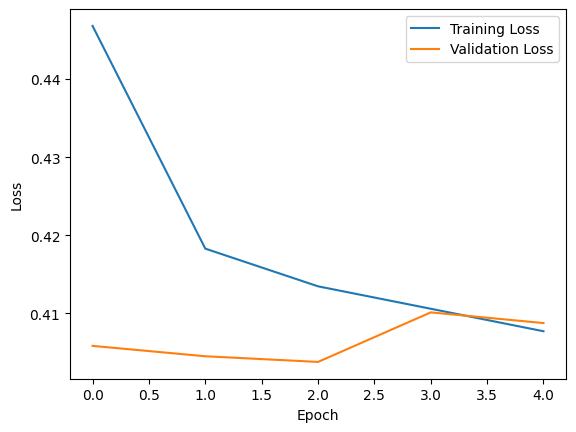

In [401]:
plt.plot(model_history.history['loss'], label='Training Loss')
plt.plot(model_history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')

#### The most ideal fit occurs between epoch 3 and 4

Text(0, 0.5, 'accuracy')

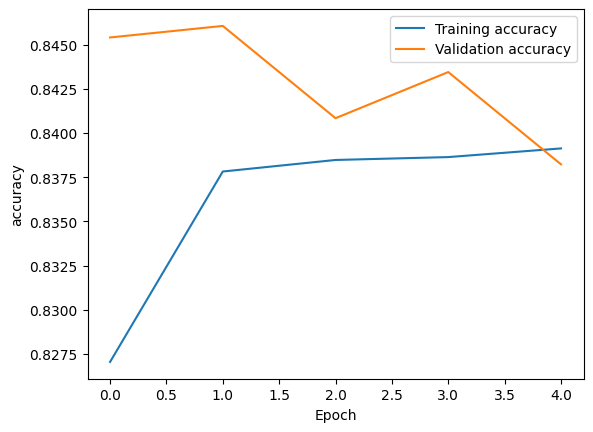

In [402]:
plt.plot(model_history.history['accuracy'], label='Training accuracy')
plt.plot(model_history.history['val_accuracy'], label='Validation accuracy')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('accuracy')